# TP biométrie et cybersécurité: analyse d'une tentative de connexion frauduleuse.

In [2]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data= pd.read_csv('DSL-StrongPasswordData.csv')
pd.set_option('display.max_columns', None)
display(data)

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,0.1328,0.0826,-0.0502,0.1000,0.2398,0.1398,0.0863,0.2148,0.1285,0.0944,0.2066,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,0.1256,0.0852,-0.0404,0.0987,0.2441,0.1454,0.0892,0.1209,0.0317,0.0776,0.0977,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,0.0903,0.2045,0.1142,0.0733,0.2190,0.1457,0.0742,0.1700,0.0958,0.0599,0.1104,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,0.1016,0.0570,-0.0446,0.0820,0.2881,0.2061,0.0729,0.1602,0.0873,0.0728,0.1111,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


<Axes: >

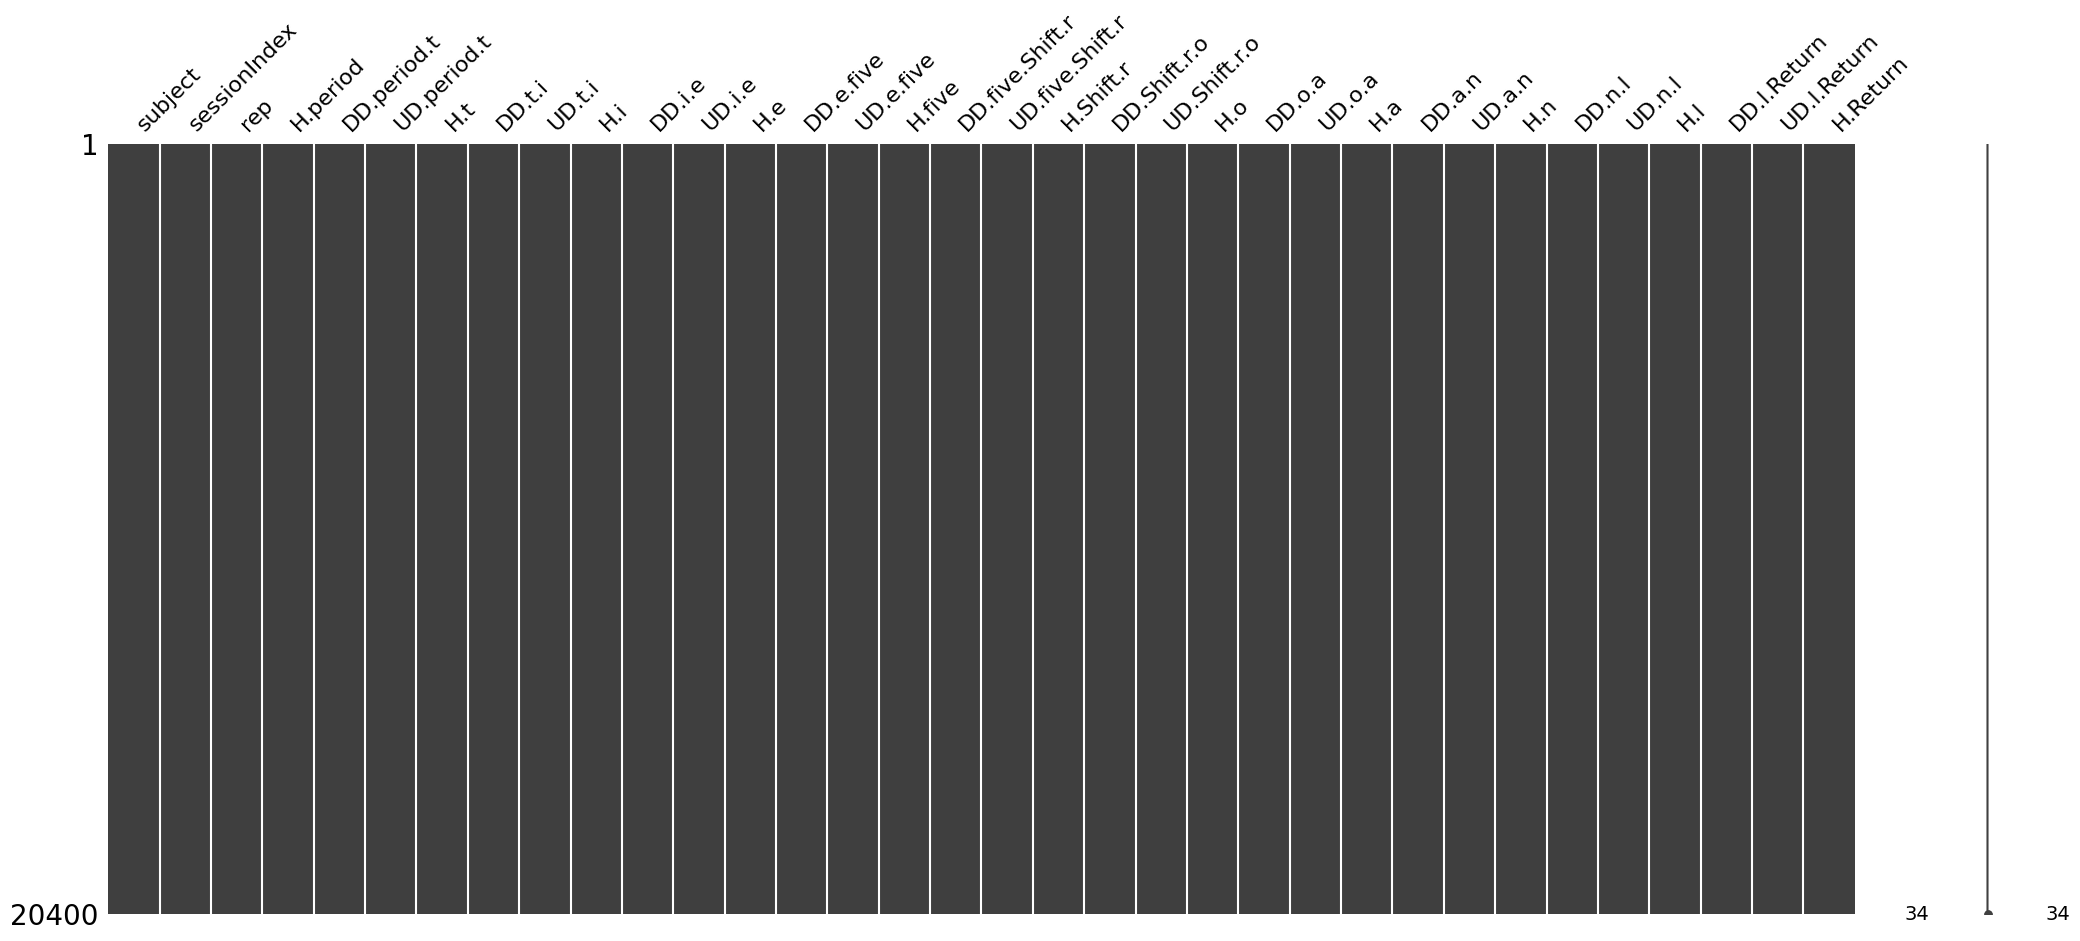

In [4]:
msno.matrix(data)

In [5]:
data.describe()


,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,0.077806,0.089138,0.377434,0.288295,0.076904,0.438887,0.361983,0.095937,0.250921,0.154984,0.088354,0.156931,0.068577,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,0.228512,0.030635,0.265342,0.266695,0.021746,0.260343,0.260886,0.033900,0.174533,0.181619,0.026427,0.106557,0.108509,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,-0.160000,0.002100,0.001300,-0.150500,0.001400,0.169400,0.085600,0.001400,0.049400,-0.086500,0.006900,0.001200,-0.228700,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,0.007400,0.068600,0.216600,0.133200,0.061000,0.307900,0.229675,0.070200,0.156500,0.054700,0.071500,0.106400,0.017000,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,0.041200,0.083400,0.289000,0.200400,0.074200,0.377500,0.302000,0.093500,0.201350,0.102200,0.086300,0.131600,0.044400,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,0.093400,0.102700,0.456850,0.369400,0.090600,0.486025,0.408900,0.116700,0.283425,0.191000,0.101900,0.167600,0.080300,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,25.915800,0.325400,4.961800,4.882700,0.198900,8.370200,8.290800,0.281700,4.152300,4.012000,0.687200,2.856700,2.815200,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


-> on va normaliser les données car il y a de grand écarts d'échelle (50, >25, <1). il y a des valeurs max qui semblent aberrantes? faire un boxplot pour visualiser les outliers. 

## Normaliser sur l'utilisateur plutôt que sur le groupe

Normaliser les données sur l'utilisateur plutôt que sur le groupe présente plusieurs avantages, surtout dans le contexte de la reconnaissance de motifs de frappe. Voici quelques raisons pour lesquelles cette approche peut être plus bénéfique :
1. Variabilité Individuelle
Chaque utilisateur a des caractéristiques de frappe uniques, influencées par des facteurs tels que l'expérience, la fatigue, et même l'état émotionnel. En normalisant sur l'utilisateur, vous tenez compte de cette variabilité individuelle, ce qui permet au modèle de mieux s'adapter aux comportements spécifiques de chaque utilisateur. Cela peut améliorer la précision de la reconnaissance des motifs de frappe.
2. Réduction des Biais de Groupe
Normaliser sur le groupe peut introduire des biais, car les utilisateurs ayant des comportements de frappe très différents peuvent être traités de la même manière. Par exemple, si un groupe d'utilisateurs a des temps de frappe généralement plus longs, normaliser sur ce groupe pourrait fausser les données d'un utilisateur qui tape plus rapidement. En normalisant sur l'utilisateur, vous évitez ce type de biais et vous vous concentrez sur les performances individuelles.
3. Meilleure Sensibilité aux Changements
Les performances d'un utilisateur peuvent fluctuer en fonction de divers facteurs (fatigue, distraction, etc.). En normalisant les données de chaque utilisateur, vous pouvez mieux détecter ces changements dans leur comportement de frappe. Cela permet au modèle de s'ajuster plus facilement aux variations et de reconnaître des motifs même lorsque les performances d'un utilisateur changent.
4. Amélioration de la Robustesse du Modèle
Un modèle qui est entraîné sur des données normalisées par utilisateur est généralement plus robuste face aux variations. Cela signifie qu'il peut mieux généraliser à de nouvelles données, car il a appris à reconnaître les motifs de chaque utilisateur indépendamment des autres. Cela est particulièrement important dans des applications où la précision est cruciale, comme la reconnaissance biométrique.
5. Interprétabilité des Résultats
Lorsque vous normalisez sur l'utilisateur, il est plus facile d'interpréter les résultats en termes de performances individuelles. Cela permet de mieux comprendre comment chaque utilisateur se comporte par rapport à son propre historique, plutôt que par rapport à un groupe qui pourrait ne pas être représentatif de ses capacités.
Conclusion
En résumé, normaliser les données sur l'utilisateur permet de mieux capturer les comportements individuels, d'éviter les biais de groupe, et d'améliorer la sensibilité et la robustesse du modèle. Cela conduit à une meilleure performance dans la reconnaissance des motifs de frappe, ce qui est essentiel pour des applications comme la biométrie comportementale.

In [6]:
# Initialiser un dictionnaire pour stocker les profils d'utilisateurs
user_profiles = {}

# Parcourir chaque ligne du DataFrame
for index, row in data.iterrows():
    user_id = row['subject']
    
    # Créer le profil si l'utilisateur n'existe pas encore
    if user_id not in user_profiles:
        user_profiles[user_id] = {
            'hold_times': {},
            'durations_between_touches': {},
            'total_hold_time': 0,
            'total_between_time': 0,
            'password_entry_count': 0
        }
    
    # Incrémenter le nombre d'entrées de mot de passe
    user_profiles[user_id]['password_entry_count'] += 1
    
    # Calcul des temps de maintien
    for key in data.columns:
        if key.startswith('H.'):
            key_name = key.split('.')[1]  # Extraire le nom de la touche
            if key_name not in user_profiles[user_id]['hold_times']:
                user_profiles[user_id]['hold_times'][key_name] = []
            user_profiles[user_id]['hold_times'][key_name].append(row[key])
            user_profiles[user_id]['total_hold_time'] += row[key]
    
    # Calculer les durées entre les frappes
    for key in data.columns:
        if key.startswith('DD.'):
            duration_between = row[key]  # Utiliser directement la ligne pour obtenir la valeur
            if pd.notna(duration_between):  # Vérifier si la valeur n'est pas NaN
                parts = key.split('.')
                if len(parts) >= 3:
                    key1 = parts[1]
                    key2 = parts[2]
                    touch_pair = f"{key1}-{key2}"
                    if touch_pair not in user_profiles[user_id]['durations_between_touches']:
                        user_profiles[user_id]['durations_between_touches'][touch_pair] = []
                    user_profiles[user_id]['durations_between_touches'][touch_pair].append(duration_between)
                    user_profiles[user_id]['total_between_time'] += duration_between

# Préparer les données pour le DataFrame
data_for_df = []

for user_id, profile in user_profiles.items():
    if profile['password_entry_count'] > 0:
        # Calculer la durée moyenne de frappe
        average_frappe_duration = (profile['total_hold_time'] + profile['total_between_time']) / profile['password_entry_count']
        
        user_data = {
            'user_id': user_id,
            'average_frappe_duration': average_frappe_duration
        }
        
        # Calcul des moyennes et écarts-types pour les temps de maintien
        for key_name, hold_times in profile['hold_times'].items():
            if hold_times:
                user_data[f'hold_time_{key_name}_mean'] = np.mean(hold_times)
                user_data[f'hold_time_{key_name}_std'] = np.std(hold_times)

        # Calcul des moyennes et écarts-types pour les durées entre les frappes
        for touch_pair, durations in profile['durations_between_touches'].items():
            if durations:
                user_data[f'duration_between_{touch_pair}_mean'] = np.mean(durations)
                user_data[f'duration_between_{touch_pair}_std'] = np.std(durations)

        data_for_df.append(user_data)

# Créer le DataFrame
df_profiles = pd.DataFrame(data_for_df)

# Afficher le DataFrame
display(df_profiles)

,user_id,average_frappe_duration,hold_time_period_mean,hold_time_period_std,hold_time_t_mean,hold_time_t_std,hold_time_i_mean,hold_time_i_std,hold_time_e_mean,hold_time_e_std,hold_time_five_mean,hold_time_five_std,hold_time_Shift_mean,hold_time_Shift_std,hold_time_o_mean,hold_time_o_std,hold_time_a_mean,hold_time_a_std,hold_time_n_mean,hold_time_n_std,hold_time_l_mean,hold_time_l_std,hold_time_Return_mean,hold_time_Return_std,duration_between_period-t_mean,duration_between_period-t_std,duration_between_t-i_mean,duration_between_t-i_std,duration_between_i-e_mean,duration_between_i-e_std,duration_between_e-five_mean,duration_between_e-five_std,duration_between_five-Shift_mean,duration_between_five-Shift_std,duration_between_Shift-r_mean,duration_between_Shift-r_std,duration_between_o-a_mean,duration_between_o-a_std,duration_between_a-n_mean,duration_between_a-n_std,duration_between_n-l_mean,duration_between_n-l_std,duration_between_l-Return_mean,duration_between_l-Return_std
0,s002,3.393175,0.106958,0.024948,0.086247,0.015814,0.077409,0.017800,0.089132,0.016588,0.090388,0.020186,0.112214,0.018334,0.091603,0.018257,0.117492,0.019735,0.084263,0.017952,0.096058,0.020490,0.082700,0.020731,0.169556,0.073980,0.150193,0.040642,0.126418,0.068204,0.494371,0.223620,0.469245,0.184457,0.205011,0.105798,0.159913,0.046146,0.121199,0.059284,0.214241,0.077905,0.248565,0.094243
1,s003,3.378104,0.157293,0.042523,0.134296,0.024789,0.127763,0.026703,0.152307,0.059188,0.098754,0.019861,0.127113,0.017728,0.133578,0.022364,0.143438,0.020779,0.110990,0.021170,0.103005,0.015638,0.099209,0.019229,0.169161,0.103447,0.155552,0.074182,0.143294,0.114067,0.256538,0.175775,0.381379,0.153658,0.204608,0.047332,0.136037,0.042552,0.122862,0.050192,0.152210,0.046538,0.268717,0.127978
2,s004,3.229923,0.103745,0.016913,0.104109,0.019850,0.106150,0.011772,0.080580,0.012979,0.087569,0.020735,0.137399,0.023054,0.100347,0.014283,0.129352,0.018451,0.085273,0.010978,0.093692,0.012012,0.075529,0.011745,0.201064,0.097979,0.148142,0.047808,0.126316,0.144654,0.369700,0.202683,0.436317,0.138495,0.225933,0.069606,0.121405,0.050946,0.117051,0.037421,0.154218,0.058836,0.226031,0.064564
3,s005,4.058900,0.081963,0.013236,0.116951,0.017279,0.089127,0.012341,0.113709,0.019019,0.108650,0.018016,0.133802,0.019746,0.093358,0.011377,0.131529,0.018020,0.085989,0.015755,0.087597,0.012548,0.092090,0.013832,0.278241,0.129947,0.227286,0.054362,0.194292,0.068483,0.334008,0.151942,0.518087,0.180728,0.339128,0.106272,0.189957,0.072308,0.185614,0.074917,0.250916,0.089060,0.406607,0.096019
4,s007,2.717106,0.095211,0.014959,0.074890,0.013671,0.076754,0.014534,0.089969,0.015922,0.069239,0.010557,0.091274,0.017641,0.100053,0.022787,0.103193,0.016973,0.125255,0.018945,0.096714,0.013992,0.083882,0.017848,0.176463,0.077850,0.120669,0.037034,0.104828,0.097487,0.249310,0.125556,0.298467,0.081483,0.163338,0.052440,0.128487,0.044940,0.117067,0.047743,0.112926,0.036602,0.239116,0.117680
5,s008,2.799945,0.087904,0.020187,0.083517,0.014840,0.078263,0.012228,0.092462,0.015490,0.092667,0.015857,0.096409,0.013147,0.092592,0.013633,0.113499,0.013331,0.096973,0.017894,0.093137,0.016990,0.100621,0.019233,0.207432,0.089697,0.114949,0.037582,0.113117,0.050956,0.309187,0.169362,0.336449,0.075316,0.136441,0.065284,0.097798,0.031220,0.110634,0.036404,0.119943,0.093625,0.225950,0.086784
6,s010,2.518486,0.089034,0.011068,0.067136,0.008804,0.081407,0.010697,0.067630,0.006890,0.060495,0.010699,0.061546,0.008401,0.087099,0.008970,0.061829,0.007427,0.080376,0.010573,0.079028,0.010323,0.078380,0.019044,0.149080,0.058138,0.147262,0.066680,0.119041,0.034426,0.232101,0.089041,0.240305,0.084670,0.137440,0.057256,0.121568,0.049635,0.118330,0.058985,0.225239,0.052204,0.214162,0.087502
7,s011,2.887162,0.081427,0.018254,0.118299,0.018605,0.092703,0.018050,0.110688,0.025014,0.097103,0.021536,0.140444,0.023733,0.098851,0.017661,0.126625,0.021286,0.119474,0.029178,0.112906,0.031888,0.125489,0.028635,0.165664,0.059300,0.140476,0.065333,0.14

C:\Users\Admin.local\AppData\Local\Temp\ipykernel_14820\3226847167.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.6775' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[index, 'total_frappe_duration'] = total_hold_time + total_between_time
C:\Users\Admin.local\AppData\Local\Temp\ipykernel_14820\3226847167.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


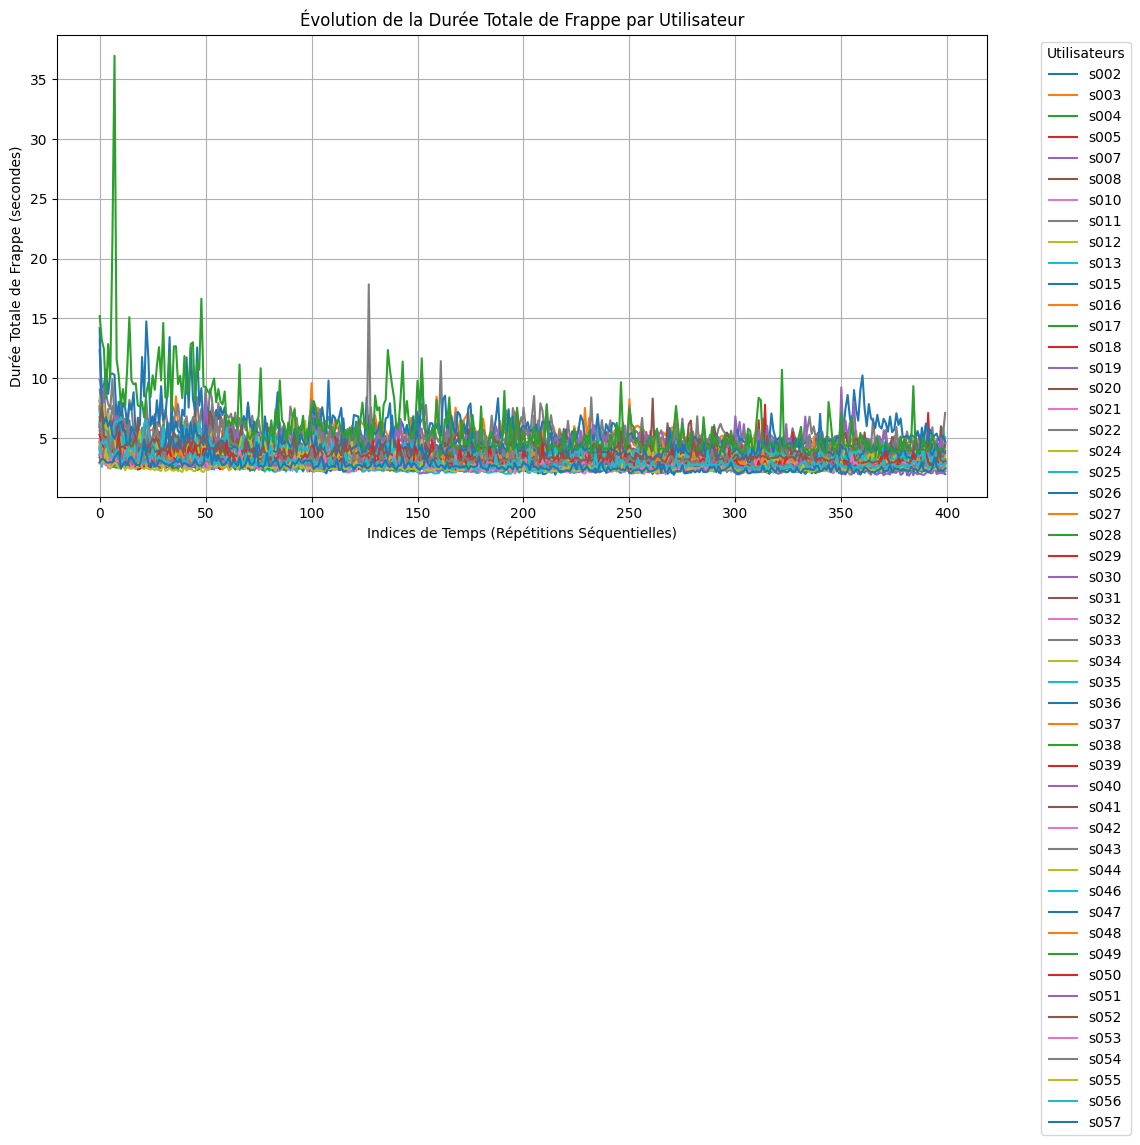

In [7]:
# Créer une nouvelle colonne pour stocker la durée totale de frappe
data['total_frappe_duration'] = 0

# Parcourir chaque ligne du DataFrame pour calculer la durée totale de frappe
for index, row in data.iterrows():
    # Calculer la durée totale de frappe pour cette ligne
    total_hold_time = sum(row[key] for key in data.columns if key.startswith('H.'))
    total_between_time = sum(row[key] for key in data.columns if key.startswith('DD.'))
    
    # Durée totale de frappe pour cette ligne
    data.at[index, 'total_frappe_duration'] = total_hold_time + total_between_time

# Créer une colonne pour l'index de temps pour chaque répétition
data['time_index'] = (data['sessionIndex'] - 1) * 50 + (data['rep'] - 1)

# Tracer le graphique
plt.figure(figsize=(12, 6))

# Tracer la courbe de la durée totale de frappe par utilisateur
for user_id in data['subject'].unique():
    user_data = data[data['subject'] == user_id]
    plt.plot(user_data['time_index'], user_data['total_frappe_duration'], label=user_id)

plt.xlabel('Indices de Temps (Répétitions Séquentielles)')
plt.ylabel('Durée Totale de Frappe (secondes)')
plt.title('Évolution de la Durée Totale de Frappe par Utilisateur')
plt.legend(title='Utilisateurs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\Admin.local\AppData\Local\Temp\ipykernel_14820\3927059846.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


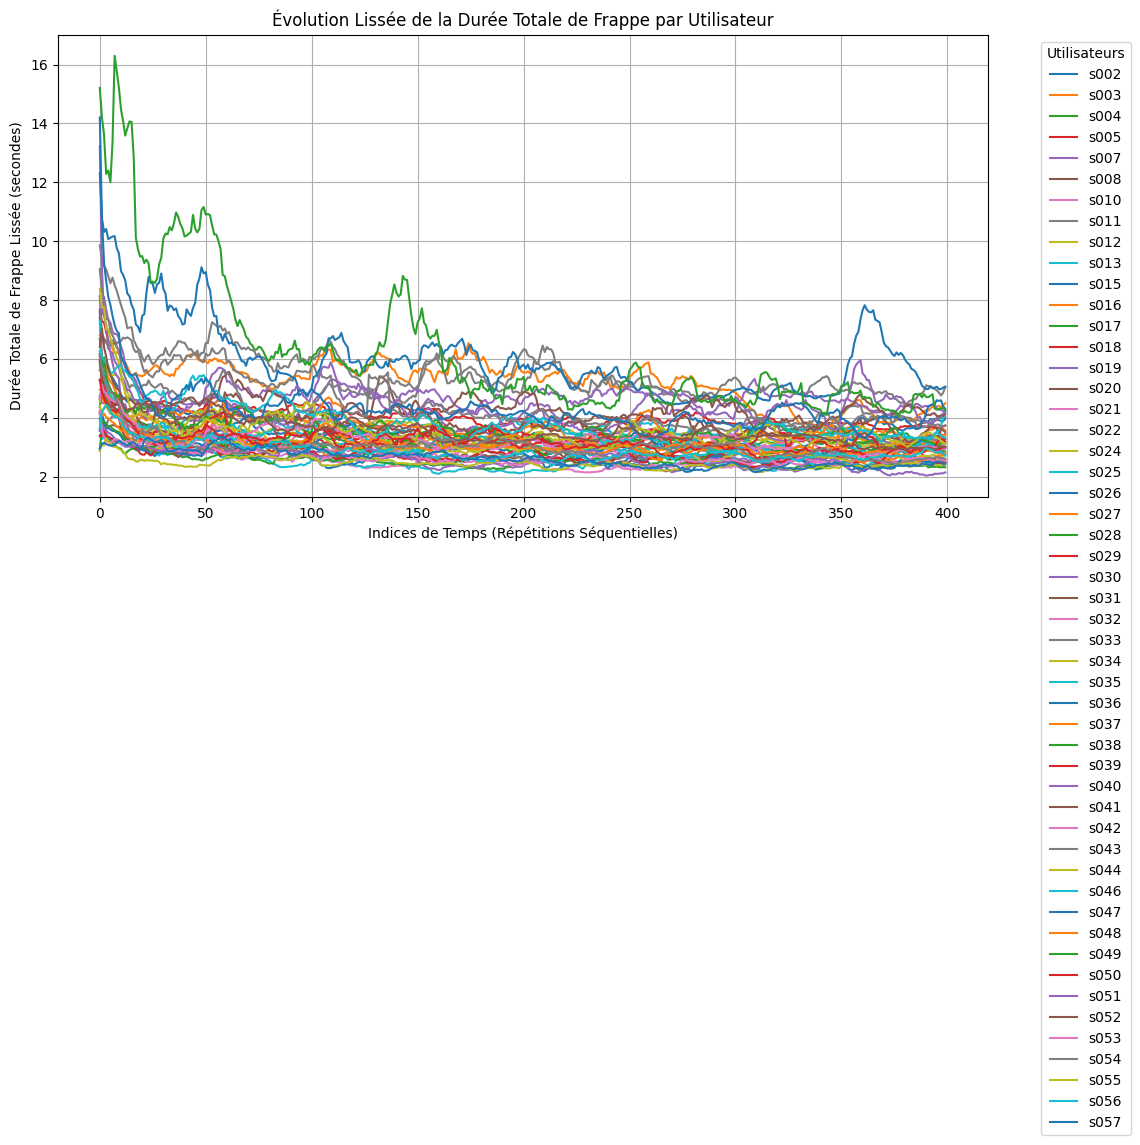

In [8]:
# Appliquer une moyenne mobile sur la durée totale de frappe
window_size = 10  # Taille de la fenêtre pour la moyenne mobile
data['smoothed_frappe_duration'] = data.groupby('subject')['total_frappe_duration'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Tracer les courbes lissées
plt.figure(figsize=(12, 6))

for user_id in data['subject'].unique():
    user_data = data[data['subject'] == user_id]
    plt.plot(user_data['time_index'], user_data['smoothed_frappe_duration'], label=user_id)

plt.xlabel('Indices de Temps (Répétitions Séquentielles)')
plt.ylabel('Durée Totale de Frappe Lissée (secondes)')
plt.title('Évolution Lissée de la Durée Totale de Frappe par Utilisateur')
plt.legend(title='Utilisateurs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
data.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return',
       'total_frappe_duration', 'time_index', 'smoothed_frappe_duration'],
      dtype='object')

In [10]:
df_profiles.columns

Index(['user_id', 'average_frappe_duration', 'hold_time_period_mean',
       'hold_time_period_std', 'hold_time_t_mean', 'hold_time_t_std',
       'hold_time_i_mean', 'hold_time_i_std', 'hold_time_e_mean',
       'hold_time_e_std', 'hold_time_five_mean', 'hold_time_five_std',
       'hold_time_Shift_mean', 'hold_time_Shift_std', 'hold_time_o_mean',
       'hold_time_o_std', 'hold_time_a_mean', 'hold_time_a_std',
       'hold_time_n_mean', 'hold_time_n_std', 'hold_time_l_mean',
       'hold_time_l_std', 'hold_time_Return_mean', 'hold_time_Return_std',
       'duration_between_period-t_mean', 'duration_between_period-t_std',
       'duration_between_t-i_mean', 'duration_between_t-i_std',
       'duration_between_i-e_mean', 'duration_between_i-e_std',
       'duration_between_e-five_mean', 'duration_between_e-five_std',
       'duration_between_five-Shift_mean', 'duration_between_five-Shift_std',
       'duration_between_Shift-r_mean', 'duration_between_Shift-r_std',
       'duration_betw

In [11]:
import pandas as pd

# Exemple de structure de df_profiles
# df_profiles = pd.DataFrame({
#     'user_id': [1, 2, 3],
#     'average_frappe_duration': [10, 20, 30],
#     'hold_time_period_mean': [5, 15, 25],
#     'hold_time_period_std': [1, 2, 3],
#     # Ajoutez d'autres colonnes selon vos besoins
# })

# Liste des colonnes à normaliser dans data
columns_to_normalize = [
    'H.period', 'DD.period.t', 'UD.period.t', 
    'H.t', 'DD.t.i', 'UD.t.i', 
    'H.i', 'DD.i.e', 'UD.i.e', 
    'H.e', 'DD.e.five', 'UD.e.five', 
    'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 
    'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 
    'H.o', 'DD.o.a', 'UD.o.a', 
    'H.a', 'DD.a.n', 'UD.a.n', 
    'H.n', 'DD.n.l', 'UD.n.l', 
    'H.l', 'DD.l.Return', 'UD.l.Return', 
    'H.Return', 'total_frappe_duration'
]

# Créer une fonction pour normaliser chaque ligne
def normalize_user(row, profiles):
    user_profile = profiles[profiles['user_id'] == row['subject']]
    
    if user_profile.empty:
        raise ValueError(f"Profil non trouvé pour le sujet : {row['subject']}")
    
    user_profile = user_profile.iloc[0]
    
    # Normaliser chaque caractéristique par rapport à la moyenne et à l'écart-type
    normalized_row = {}
    for col in columns_to_normalize:
        mean_col = f"{col}_mean"  # Assurez-vous que ces colonnes existent dans df_profiles
        std_col = f"{col}_std"
        
        if mean_col in user_profile and std_col in user_profile:
            normalized_row[col] = (row[col] - user_profile[mean_col]) / user_profile[std_col]
        else:
            normalized_row[col] = row[col]  # Si pas de normalisation, garder la valeur d'origine
    
    return pd.Series(normalized_row)

# Appliquer la normalisation à chaque utilisateur
normalized_data = data.copy()  # Créer une copie de data pour ne pas modifier l'original

# Normaliser chaque ligne
try:
    normalized_data[columns_to_normalize] = data.apply(lambda row: normalize_user(row, df_profiles), axis=1)
except ValueError as e:
    print(e)

# Afficher les résultats
print(normalized_data)

      subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0        s002             1    1    0.1491       0.3979       0.2488  0.1069   
1        s002             1    2    0.1111       0.3451       0.2340  0.0694   
2        s002             1    3    0.1328       0.2072       0.0744  0.0731   
3        s002             1    4    0.1291       0.2515       0.1224  0.1059   
4        s002             1    5    0.1249       0.2317       0.1068  0.0895   
...       ...           ...  ...       ...          ...          ...     ...   
20395    s057             8   46    0.0884       0.0685      -0.0199  0.1095   
20396    s057             8   47    0.0655       0.0630      -0.0025  0.0910   
20397    s057             8   48    0.0939       0.1189       0.0250  0.1008   
20398    s057             8   49    0.0923       0.1294       0.0371  0.0913   
20399    s057             8   50    0.0596       0.1310       0.0714  0.0992   

       DD.t.i  UD.t.i     H.i  DD.i.e  

# Feature engineering

## Séparation des ensembles

In [12]:
# 1. Identifier tous les utilisateurs
users = normalized_data['subject'].unique()
np.random.seed(123)  # Pour la reproductibilité

# 2. Shuffle et diviser les utilisateurs en trois groupes : A (40%), B (40%), C (20%)
np.random.shuffle(users)
n_users = len(users)

group_A = users[:int(0.4 * n_users)]
group_B = users[int(0.4 * n_users):int(0.8 * n_users)]
group_C = users[int(0.8 * n_users):]

# 3. Initialiser les DataFrames pour les ensembles
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

# 4. Répartir les essais pour le groupe A
for user in group_A:
    user_data = normalized_data[normalized_data['subject'] == user]
    train_size = int(0.6 * user_data.shape[0])  # 60% pour l'entraînement
    val_size = int(0.3 * user_data.shape[0])    # 30% pour la validation
    test_size = int(0.1 * user_data.shape[0])   # 10% pour le test
    
    train_data = pd.concat([train_data, user_data.sample(n=train_size)])
    val_data = pd.concat([val_data, user_data.sample(n=val_size)])
    test_data = pd.concat([test_data, user_data.sample(n=test_size)])

# 5. Répartir les essais pour le groupe B
for user in group_B:
    user_data = normalized_data[normalized_data['subject'] == user]
    train_size = int(0.5 * user_data.shape[0])  # 50% pour l'entraînement
    val_size = int(0.25 * user_data.shape[0])   # 25% pour la validation
    test_size = int(0.25 * user_data.shape[0])   # 25% pour le test
    
    train_data = pd.concat([train_data, user_data.sample(n=train_size)])
    val_data = pd.concat([val_data, user_data.sample(n=val_size)])
    test_data = pd.concat([test_data, user_data.sample(n=test_size)])

# 6. Répartir les essais pour le groupe C
for user in group_C:
    user_data = normalized_data[normalized_data['subject'] == user]
    test_data = pd.concat([test_data, user_data])  # 100% pour le test

# 7. Préparer X et y
X_train = train_data.drop(columns=['subject', 'sessionIndex', 'rep'])  
y_train = train_data['subject']

X_val = val_data.drop(columns=['subject', 'sessionIndex', 'rep'])
y_val = val_data['subject']

X_test = test_data.drop(columns=['subject', 'sessionIndex', 'rep'])
y_test = test_data['subject']

# Afficher les tailles des ensembles
print(f'Taille de l\'ensemble d\'entraînement : {X_train.shape[0]}')
print(f'Taille de l\'ensemble de validation : {X_val.shape[0]}')
print(f'Taille de l\'ensemble de test : {X_test.shape[0]}')

Taille de l'ensemble d'entraînement : 8800
Taille de l'ensemble de validation : 4400
Taille de l'ensemble de test : 7200


## Matrice de corrélation

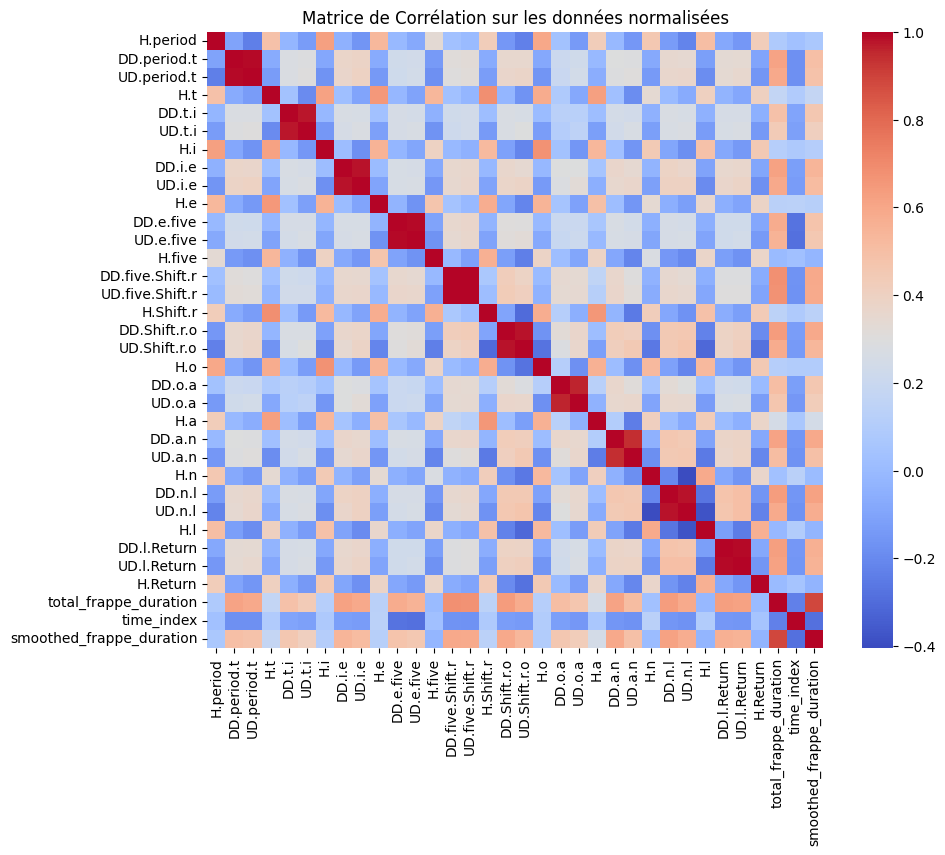

In [13]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation sur les données normalisées')
plt.show()

Il semblerait que les colonnes DD et UD soient très fortement corrélées. On pourrait donc envisager de ne garder qu'une des deux pour entraîner notre modèle. On tendrait à garder la colonne DD car c'est celle que nous avons utilisée en priorité pour faire les profils utilisateurs. Faisons un arbre de décision pour voir si ces colonnes UD ont une importance.

## Arbre de décision

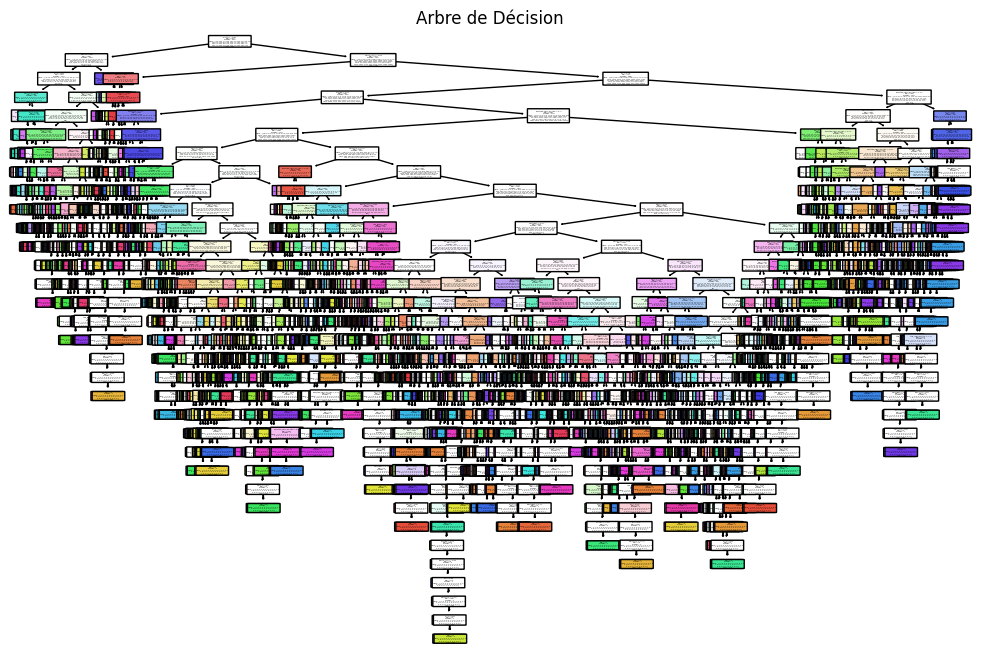

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = data.drop(columns=['subject', 'sessionIndex', 'rep'])  # Remplacez 'subject' par le nom de votre colonne cible
y = data['subject']  # La colonne cible

# 2. Créer et entraîner l'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

# 3. Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True)
plt.title('Arbre de Décision')
plt.show()

Nombre de feuilles dans l'arbre : 1519
Précision de l'arbre : 0.34


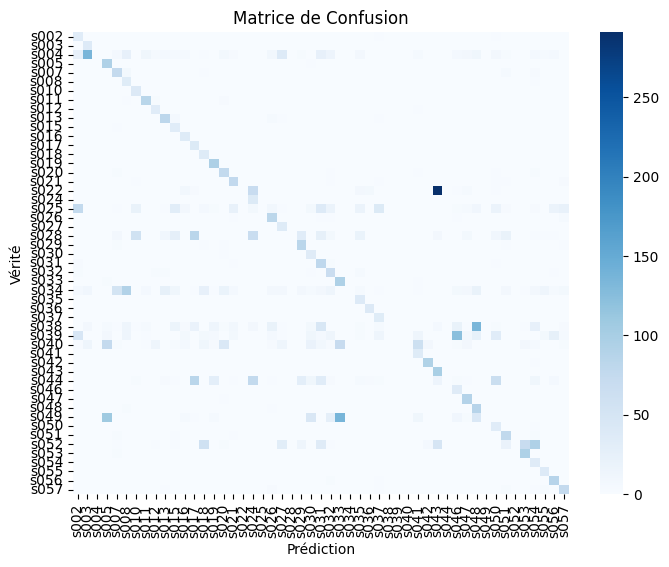

In [15]:
# Supposons que vous avez déjà entraîné votre arbre de décision
n_leaves = decision_tree.get_n_leaves()

# Afficher le nombre de feuilles
print(f"Nombre de feuilles dans l'arbre : {n_leaves}")

from sklearn.metrics import accuracy_score

# Prédire les valeurs sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision de l'arbre : {accuracy:.2f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Vérité')
plt.xlabel('Prédiction')
plt.title('Matrice de Confusion')
plt.show()

In [16]:
from sklearn.metrics import classification_report

# Prédire les valeurs sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport
print("Rapport de Classification :")
print(report)

Rapport de Classification :
              precision    recall  f1-score   support

        s002       0.17      0.85      0.28        40
        s003       0.18      0.95      0.30        40
        s004       0.00      0.00      0.00       400
        s005       0.32      0.94      0.47       100
        s007       0.44      0.75      0.55       100
        s008       0.18      0.88      0.30        40
        s010       0.31      1.00      0.47        40
        s011       0.75      0.85      0.79       100
        s012       0.54      0.85      0.66        40
        s013       0.57      0.81      0.67       100
        s015       0.23      0.85      0.36        40
        s016       0.41      0.93      0.56        40
        s017       0.16      0.97      0.28        40
        s018       0.23      0.93      0.37        40
        s019       0.59      0.96      0.73       100
        s020       0.46      0.76      0.57       100
        s021       0.54      0.77      0.63       100

c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

                     Feature  Importance
26                    UD.n.l    0.138528
33  smoothed_frappe_duration    0.084630
15                 H.Shift.r    0.045517
29               UD.l.Return    0.044388
6                        H.i    0.042497
0                   H.period    0.042008
3                        H.t    0.039731
18                       H.o    0.035662
11                 UD.e.five    0.033544
21                       H.a    0.032476
14           UD.five.Shift.r    0.028006
5                     UD.t.i    0.026774
30                  H.Return    0.026665
17              UD.Shift.r.o    0.024267
4                     DD.t.i    0.023982
27                       H.l    0.023094
2                UD.period.t    0.022917
12                    H.five    0.022878
23                    UD.a.n    0.022787
32                time_index    0.022114
10                 DD.e.five    0.021460
7                     DD.i.e    0.021085
16              DD.Shift.r.o    0.020230
20              

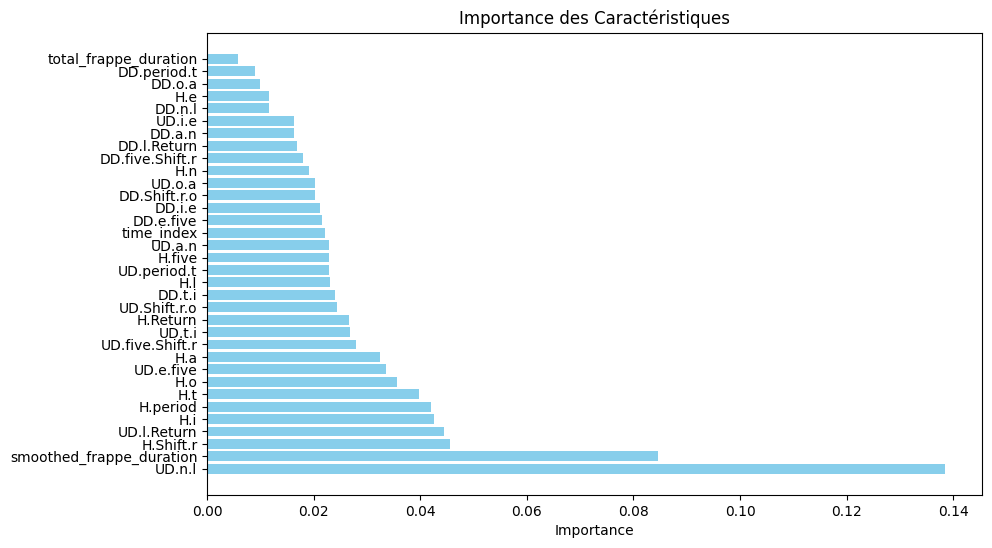

In [17]:
# Après avoir entraîné l'arbre de décision

# 1. Récupérer les importances des caractéristiques
importances = decision_tree.feature_importances_

# 2. Créer un DataFrame pour les visualiser
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# 3. Trier les importances par ordre décroissant
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Afficher les importances des caractéristiques
print(feature_importance_df)

# 5. Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Caractéristiques')
plt.show()

D'après ces résultats, il vaut mieux garder les colonnes UD car ce sont elles qui contribuent le plus à l'arbre de décision. On veut garder que les caractéristiques dont l'importance est supérieure à 0.02 et voir si cela améliore la performance de notre modèle ou non. 

In [18]:
# Supposons que vous avez déjà le DataFrame feature_importance_df

# 1. Filtrer les caractéristiques avec une importance supérieure à 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.02]['Feature']

# 2. Créer un nouveau DataFrame X avec uniquement les caractéristiques importantes
X_filtered = X[important_features].copy()

# Afficher les caractéristiques retenues
print("Caractéristiques retenues :")
print(important_features)

Caractéristiques retenues :
26                      UD.n.l
33    smoothed_frappe_duration
15                   H.Shift.r
29                 UD.l.Return
6                          H.i
0                     H.period
3                          H.t
18                         H.o
11                   UD.e.five
21                         H.a
14             UD.five.Shift.r
5                       UD.t.i
30                    H.Return
17                UD.Shift.r.o
4                       DD.t.i
27                         H.l
2                  UD.period.t
12                      H.five
23                      UD.a.n
32                  time_index
10                   DD.e.five
7                       DD.i.e
16                DD.Shift.r.o
20                      UD.o.a
Name: Feature, dtype: object


## Clustering (mis à jour avec les données normalisées sur les utilisateurs)

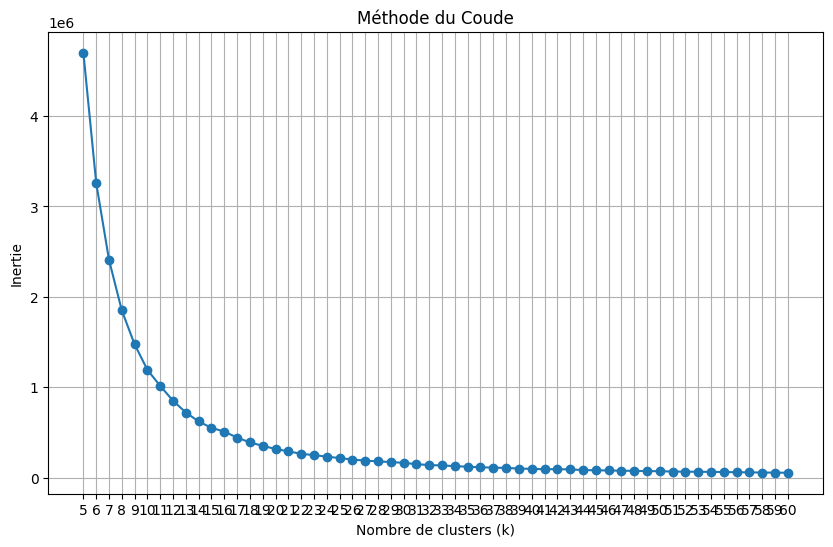

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Calculer l'inertie pour une plage de k
inertias = []
k_values = range(5, 61)  # Tester k de 1 à 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_values)
plt.grid()
plt.show()

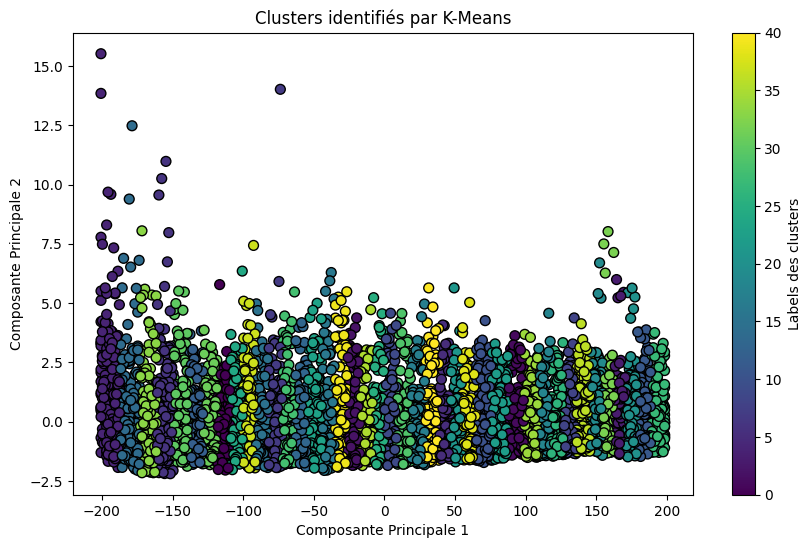

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 2. Appliquer K-Means
k = 41  # Choisissez un nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X_train)

# 3. Obtenir les labels des clusters
labels = kmeans.labels_

# 4. Visualiser les clusters (optionnel)
# Réduction de dimensionnalité pour la visualisation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters identifiés par K-Means')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Labels des clusters')
plt.show()



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres : {'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'n_iter_no_change': 10, 'validation_fraction': 0.1}
Meilleur score : 0.7155681818181818
Score sur les données de test : 0.2351388888888889


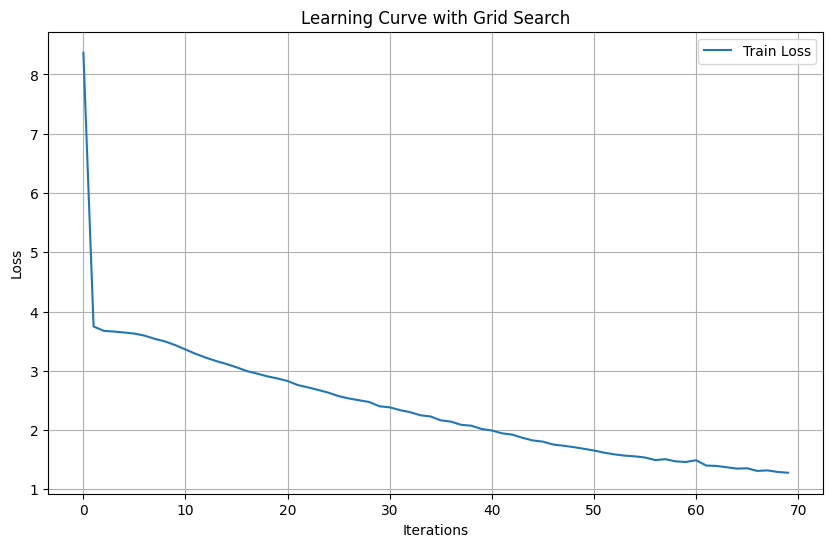

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


# # Retirer les colonnes non pertinentes
# data_cleaned = data.drop(['subject', 'sessionIndex', 'rep'], axis=1)

# # Sélectionner uniquement les colonnes quantitatives (numériques)
# X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
# y = data['subject']  # La colonne 'subject' comme cible

# # Séparer les données en jeu d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Appliquer la normalisation (standardisation)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Définir les paramètres à tester dans la grille
param_grid = {
    'hidden_layer_sizes': [(50, 30), (100, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'early_stopping': [True],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10]
}

# Créer un objet GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Entraîner le modèle en utilisant GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les scores
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score : {grid_search.best_score_}")

# Évaluer le modèle sur les données de test
test_score = grid_search.score(X_test, y_test)
print(f"Score sur les données de test : {test_score}")

# Tracer les courbes d'apprentissage du meilleur modèle
best_model = grid_search.best_estimator_
plt.figure(figsize=(10, 6))
plt.plot(best_model.loss_curve_, label='Train Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve with Grid Search')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier



# Entraîner un modèle MLP avec les données normalisées
model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.3167
